In [1]:
import time
print(time.ctime())
%load_ext ipydex.displaytools

Wed Nov 17 19:00:32 2021


In [2]:
# Original Source: https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/301_regression.py
# → modified by me

"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
torch.manual_seed(1)    # reproducibility

# create data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden_layer = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.prediction_layer = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        # x = torch.sigmoid(self.hidden_layer(x))      # activation function for hidden layer
        # x = torch.tanh(self.hidden_layer(x))      # activation function for hidden layer
        x = torch.relu(self.hidden_layer(x))      # activation function for hidden layer
        x = self.prediction_layer(x)             # linear output
        return x



In [3]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
  (prediction_layer): Linear(in_features=10, out_features=1, bias=True)
)


## Train only for 30 episodes (→ poor result)

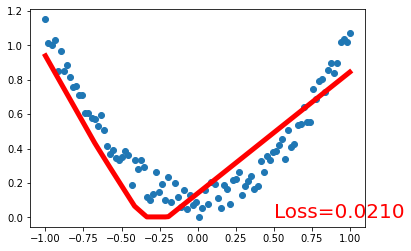

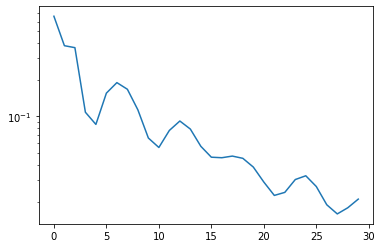

In [4]:
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam(net.parameters(), lr=0.2)

loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

loss_over_epoch = []
for t in range(30):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    loss_over_epoch.append(loss.data.numpy())

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

plt.cla()
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
plt.pause(0.1)

plt.figure()
plt.semilogy(loss_over_epoch)
plt.show()

### Access internal data of the trained model

In [5]:
net.hidden_layer

Linear(in_features=1, out_features=10, bias=True)

In [6]:
np_weights_hl = net.hidden_layer.weight.data.numpy() ##:
np_biases_hl = net.hidden_layer.bias.data.numpy() ##:
np_weights_pl = net.prediction_layer.weight.data.numpy() ##:
np_biases_pl = net.prediction_layer.bias.data.numpy() ##:

np_weights_hl := array([[-0.35343778],
                        [-0.8909344 ],
                        [ 2.1940842 ],
                        [ 0.4330032 ],
                        [-1.4801755 ],
                        [-1.1389841 ],
                        [-0.1590852 ],
                        [-2.080259  ],
                        [ 0.68545806],
                        [ 0.2072314 ]], dtype=float32)

---

np_biases_hl := 
array([-1.0813314 , -0.5397242 ,  0.3974778 , -0.663581  , -0.61848813,
       -0.80092907, -0.3506518 , -0.6856603 , -0.7237189 , -0.7201042 ],
      dtype=float32)

---

np_weights_pl := 
array([[ 0.43693346,  0.0273251 ,  0.33480373, -0.19975337,  0.39874664,
         0.12019586,  0.2205472 ,  0.37073928,  0.18220124,  0.29357794]],
      dtype=float32)

---

np_biases_pl := array([0.00145071], dtype=float32)

---

### Overwrite the internal data with saved results (from a longer training) → imrove results

In [12]:
# this was used to create the model-file (4 saved arrays):
# np.savez('model2000ep.npz', np_weights_hl, np_biases_hl, np_weights_pl, np_biases_pl)
# the arrays were saved after training with more episodes (2000)


model = np.load('model2000ep.npz') ##:
arr0 = model["arr_0"] ##:
arr1 = model["arr_1"] ##:
arr2 = model["arr_2"] ##:
arr3 = model["arr_3"] ##:

model := <numpy.lib.npyio.NpzFile at 0x7f2d06f32a60>

---

arr0 := array([[-0.4139127 ],
               [-0.8488058 ],
               [ 2.8964984 ],
               [ 0.4330032 ],
               [-1.906988  ],
               [-1.123925  ],
               [-0.1922372 ],
               [-1.214931  ],
               [ 0.68545806],
               [ 0.2072314 ]], dtype=float32)

---

arr1 := 
array([-1.1522069 , -0.9759097 , -0.0072128 , -0.663581  , -1.0795624 ,
       -0.8648852 , -0.43701234,  0.6121325 , -0.7237189 , -0.7201042 ],
      dtype=float32)

---

arr2 := 
array([[ 0.46027693,  0.27537024,  0.45353475, -0.19975337,  0.45014322,
         0.12816443,  0.25700513,  0.53786045,  0.18220124,  0.29357794]],
      dtype=float32)

---

arr3 := array([-0.30369848], dtype=float32)

---

In [13]:
# write the model data (weights and biases) back to the NN-model
net.hidden_layer.weight.data = torch.Tensor(arr0)
net.hidden_layer.bias.data = torch.Tensor(arr1)
net.prediction_layer.weight.data = torch.Tensor(arr2)
net.prediction_layer.bias.data = torch.Tensor(arr3)

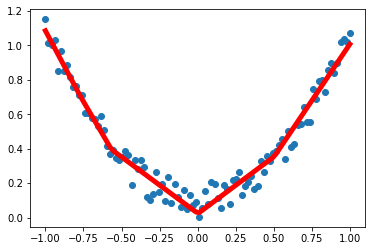

In [14]:
prediction = net(x)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)